## Instruções:

- Desenvolver a coleta, limpeza, análise e visualização com base de dados da Olist.
- Formular o mínimo de 4 perguntas para responder com suas análises;
- Utilizar pelo menos 3 bases de dados da Olist.
- Criar pelo menos 3 gráficos.
- Exportar sua base final.
- Submeter uma pasta que contenha:
    * o arquivo seu_nome.ipynb com sua análise exploratória;
    * a base final criada por você no formato .csv;
    * as bases da olist em .csv que você utilizou na criação da sua analise exploratória.

In [416]:
import pandas as pd

#### Importando as tabelas de ordens, pagamentos e reviews para fazer o merge em um único dataframe.

In [417]:
df_pedidos = pd.read_csv('dataset_olist/olist_orders_dataset.csv')
df_pedidos.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [418]:
df_pagamentos = pd.read_csv('dataset_olist/olist_order_payments_dataset.csv')
df_pagamentos.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [419]:
df_itens = pd.read_csv('dataset_olist/olist_order_items_dataset.csv')
df_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [420]:
df_reviews = pd.read_csv('dataset_olist/olist_order_reviews_dataset.csv')
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [421]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [422]:
df_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [423]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [424]:
df_olist_pedidos_pag = pd.merge(df_pedidos, df_pagamentos, on=['order_id'], how='inner')
df_olist_pedidos_pag.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59


In [425]:
df_analise = pd.merge(df_olist_pedidos_pag, df_reviews, on=['order_id'], how='inner')
df_analise.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


In [426]:
df_analise = pd.merge(df_analise, df_itens, on=['order_id'], how='inner')
df_analise.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72


#### Limpando os dados

In [427]:
columns_drop = ['order_approved_at', 'customer_id', 'seller_id', 'shipping_limit_date', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'review_comment_title']
df_analise = df_analise.drop(columns_drop, axis=1)
df_analise

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,1,credit_card,3,195.00,29bb71b2760d0f876dfa178a76bc4734,4,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10
117325,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,1,credit_card,5,271.01,371579771219f6db2d830d50805977bb,5,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,1,b80910977a37536adeddd63663f916ad,205.99,65.02
117326,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,1,credit_card,4,441.16,8ab6855b9fe9b812cd03a480a25058a1,2,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59
117327,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,1,credit_card,4,441.16,8ab6855b9fe9b812cd03a480a25058a1,2,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59


In [428]:
# filtrando apenas pedidos entregues
#df_analise = df_pedidos.loc[df_pedidos['order_status'] == 'delivered']
#df_analise = df_analise.reset_index(drop=True)
df_analise

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,1,credit_card,3,195.00,29bb71b2760d0f876dfa178a76bc4734,4,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10
117325,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,1,credit_card,5,271.01,371579771219f6db2d830d50805977bb,5,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,1,b80910977a37536adeddd63663f916ad,205.99,65.02
117326,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,1,credit_card,4,441.16,8ab6855b9fe9b812cd03a480a25058a1,2,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59
117327,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,1,credit_card,4,441.16,8ab6855b9fe9b812cd03a480a25058a1,2,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59


In [429]:
df_analise.drop_duplicates(subset=['order_id'])

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
5,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1,credit_card,1,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
6,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1,credit_card,1,28.62,e50934924e227544ba8246aeb3770dd4,5,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117323,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,1,credit_card,3,85.08,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08
117324,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,1,credit_card,3,195.00,29bb71b2760d0f876dfa178a76bc4734,4,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10
117325,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,1,credit_card,5,271.01,371579771219f6db2d830d50805977bb,5,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,1,b80910977a37536adeddd63663f916ad,205.99,65.02
117326,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,1,credit_card,4,441.16,8ab6855b9fe9b812cd03a480a25058a1,2,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59


In [430]:
df_analise.to_csv('base_final_s14_larissa.csv', index=False)

## O que queremos investigar?

- Qual a média de valor pago por ordem?
- Qual a forma de pagamento mais utilizada pelos clientes?
- Quais os 10 produtos mais comprados com nota de avaliação máxima?
- Qual o número médio de parcelas de cada compra?

In [431]:
df_valor_medio = df_analise["price"].mean()
print(f"O valor médio de cada ordem foi de R${df_valor_medio:.2f}")

O valor médio de cada ordem foi de R$120.52


In [432]:
df_analise.value_counts(["payment_type"], normalize=True)

payment_type
credit_card     0.737414
boleto          0.194624
voucher         0.053542
debit_card      0.014421
Name: proportion, dtype: float64

In [433]:
df_qde = df_analise.value_counts(["product_id"]).to_frame()

In [434]:
df_analise.groupby(["product_id"]).mean(["review_score"])
df_media_score = df_analise.sort_values(["review_score"], ascending=False)

In [435]:
df_media_score = pd.merge(df_qde, df_media_score, on=['product_id'], how='inner')
df_media_score = df_media_score.drop_duplicates(["product_id"]).reset_index(drop=True)

In [436]:
df_media_score.sort_values(by=["count", "review_score"], ascending=False)
df_media_score["product_id"].head(10)

0    aca2eb7d00ea1a7b8ebd4e68314663af
1    99a4788cb24856965c36a24e339b6058
2    422879e10f46682990de24d770e7f83d
3    389d119b48cf3043d311335e499d9c6b
4    368c6c730842d78016ad823897a372db
5    53759a2ecddad2bb87a079a1f1519f73
6    d1c427060a0f73f6b889a5c7c61f2ac4
7    53b36df67ebb7c41585e8d54d6772e08
8    154e7e31ebfa092203795c972e5804a6
9    3dd2a17168ec895c781a9191c1e95ad7
Name: product_id, dtype: object

In [437]:
df_parcelas_medio = df_analise["payment_installments"].mean()
print(f"A quantidade média de parcelas de cada compra é {df_parcelas_medio:.0f}")

A quantidade média de parcelas de cada compra é 3


### Gerando visualizações

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

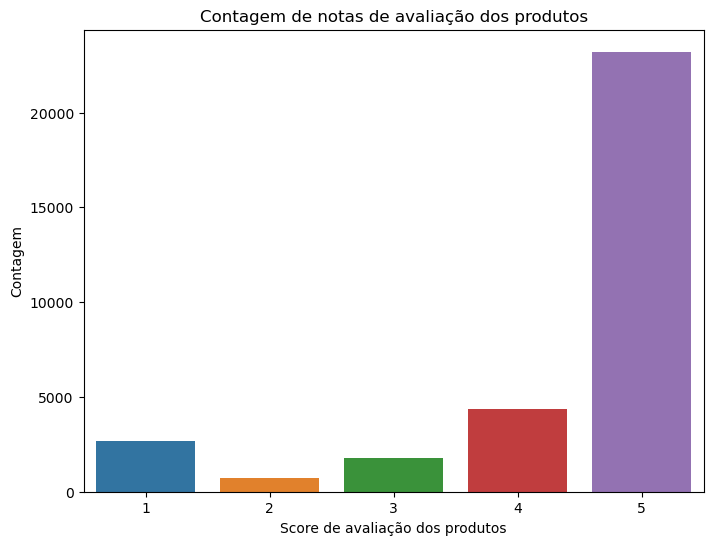

In [439]:
plt.figure(figsize=(8, 6))

sns.countplot(data = df_media_score, x = 'review_score')

plt.title('Contagem de notas de avaliação dos produtos')
plt.xlabel('Score de avaliação dos produtos')
plt.ylabel('Contagem')

plt.show()

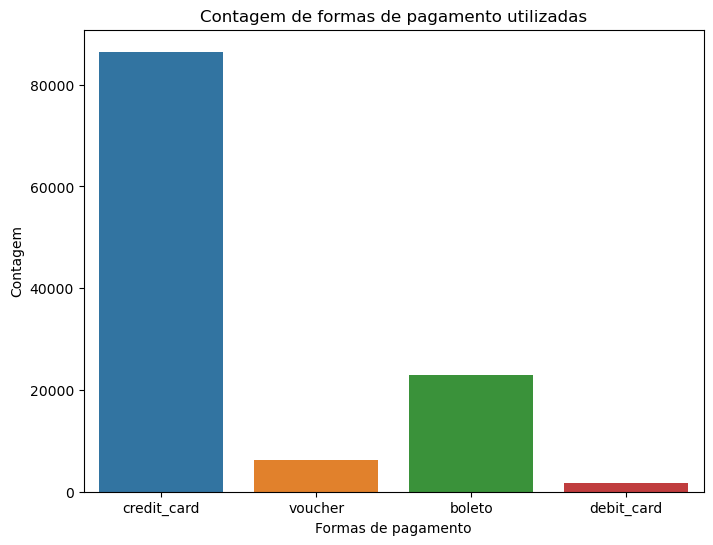

In [440]:
plt.figure(figsize=(8, 6))

sns.countplot(data = df_analise, x = 'payment_type')

plt.title('Contagem de formas de pagamento utilizadas')
plt.xlabel('Formas de pagamento')
plt.ylabel('Contagem')

plt.show()

#### Insights

- O valor médio de cada ordem foi de R$120.52
- Cerca de 74% dos clientes utiliza cartão de crédito como forma de pagamento.
- A quantidade média de parcelas de cada compra é 3
- Os produtos mais comprados com nota máxima de avaliação são: 
aca2eb7d00ea1a7b8ebd4e68314663af
99a4788cb24856965c36a24e339b6058
422879e10f46682990de24d770e7f83d
389d119b48cf3043d311335e499d9c6b
368c6c730842d78016ad823897a372db
53759a2ecddad2bb87a079a1f1519f73
d1c427060a0f73f6b889a5c7c61f2ac4
53b36df67ebb7c41585e8d54d6772e08
154e7e31ebfa092203795c972e5804a6
3dd2a17168ec895c781a9191c1e95ad7
- A maior parte dos produtos recebe nota de avaliação máxima.